In [2]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Image not found: /Users/rigo/HNoteApp/HNote/Digits/zero.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Image: one.png, Predicted: one


[ WARN:0@19.419] global loadsave.cpp:241 findDecoder imread_('/Users/rigo/HNoteApp/HNote/Digits/zero.png'): can't open/read file: check file path/integrity


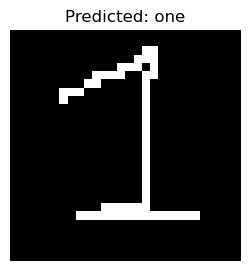

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Image: two.png, Predicted: two


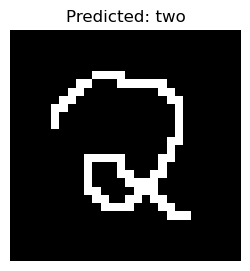

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: three.png, Predicted: three


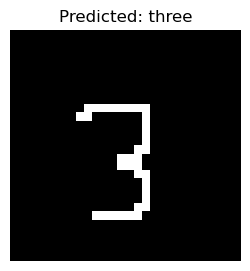

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Image: four.png, Predicted: four


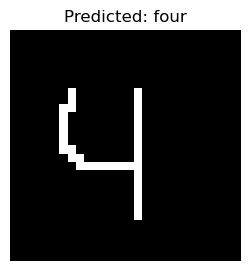

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Image: five.png, Predicted: five


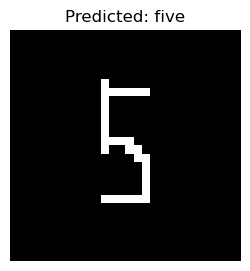

Image not found: /Users/rigo/HNoteApp/HNote/Digits/six.png
Image not found: /Users/rigo/HNoteApp/HNote/Digits/seven.png
Image not found: /Users/rigo/HNoteApp/HNote/Digits/eight.png
Image not found: /Users/rigo/HNoteApp/HNote/Digits/nine.png


[ WARN:0@19.820] global loadsave.cpp:241 findDecoder imread_('/Users/rigo/HNoteApp/HNote/Digits/six.png'): can't open/read file: check file path/integrity
[ WARN:0@19.821] global loadsave.cpp:241 findDecoder imread_('/Users/rigo/HNoteApp/HNote/Digits/seven.png'): can't open/read file: check file path/integrity
[ WARN:0@19.821] global loadsave.cpp:241 findDecoder imread_('/Users/rigo/HNoteApp/HNote/Digits/eight.png'): can't open/read file: check file path/integrity
[ WARN:0@19.821] global loadsave.cpp:241 findDecoder imread_('/Users/rigo/HNoteApp/HNote/Digits/nine.png'): can't open/read file: check file path/integrity


In [3]:
# Load the saved model
model = tf.keras.models.load_model('/Users/rigo/HNoteApp/HNote/Models/my_model.keras')

# File names : Only have files one to five :
number_names = ["zero", "one", "two", "three", "four",
                "five", "six", "seven", "eight", "nine"]

for name in number_names:
    file_path = f"/Users/rigo/HNoteApp/HNote/Digits/{name}.png"
    # /Users/rigo/HNoteApp/HNote/Digits

    # Read the image and convert it to grayscale
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Image not found: {file_path}")
        continue

    # Resize to 28x28 (This is the expected input size)
    img_resized = cv2.resize(img, (28, 28))

    # Normalize pixel values
    img_normalized = img_resized.astype("float32") / 255.0

    # Reshape to (1, 28, 28, 1) to match model input shape
    img_input = np.expand_dims(img_normalized, axis=0)  # (1, 28, 28)
    img_input = np.expand_dims(img_input, axis=-1)      # (1, 28, 28, 1)

    # Create the decoder input (SOS token = 10)
    decoder_input = np.array([[10]])  # shape: (1, 1)

    # Predicting using the model
    predictions = model.predict([img_input, decoder_input])
    predicted_token = np.argmax(predictions, axis=-1)[0, 0]
    predicted_name = number_names[predicted_token]

    print(f"Image: {name}.png, Predicted: {predicted_name}")

    # Visualize
    plt.figure(figsize=(3, 3))
    plt.imshow(img_resized, cmap="gray")
    plt.title(f"Predicted: {predicted_name}")
    plt.axis("off")
    plt.show()
